In [1]:
import numpy as np
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import matplotlib.pyplot as plt

In [2]:
train_data = np.load("landmark_train_final.npz")
val_data = np.load("landmark_val_final.npz")
test_data = np.load("landmark_test_final.npz")

X_train, y_train = train_data["data"], train_data["labels"]
X_val, y_val = val_data["data"], val_data["labels"]
X_test, y_test = test_data["data"], test_data["labels"]

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 8582
Validation set size: 1839
Test set size: 1840


In [3]:
with open("scaler_version2.pkl", "rb") as file:
    scaler = pickle.load(file)

# Scale Data
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Data scaled using scaler_version2.pkl.")

Data scaled using scaler_version2.pkl.


In [4]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15]  # Define range of k values
best_k = None
best_accuracy = 0
results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Evaluate on Validation Data
    y_val_pred = knn.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_val_pred)
    results[k] = accuracy

    print(f"K = {k}, Validation Accuracy = {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f"\nBest K: {best_k}")
print(f"Best Validation Accuracy: {best_accuracy:.4f}")

K = 1, Validation Accuracy = 0.9337
K = 3, Validation Accuracy = 0.9413
K = 5, Validation Accuracy = 0.9402
K = 7, Validation Accuracy = 0.9434
K = 9, Validation Accuracy = 0.9396
K = 11, Validation Accuracy = 0.9402
K = 13, Validation Accuracy = 0.9413
K = 15, Validation Accuracy = 0.9396

Best K: 7
Best Validation Accuracy: 0.9434


In [5]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [6]:
with open("KNNVersion2_2.pkl", "wb") as file:
    pickle.dump(knn_final, file)
print("\nFinal KNN model saved as KNNVersion2.pkl.")


Final KNN model saved as KNNVersion2.pkl.


In [7]:
start_time = time.time()
y_test_pred = knn_final.predict(X_test_scaled)
latency = time.time() - start_time

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average="weighted")
recall = recall_score(y_test, y_test_pred, average="weighted")
f1 = f1_score(y_test, y_test_pred, average="weighted")

print("\nTest Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Latency: {latency:.4f} seconds")


Test Results:
Accuracy: 0.9391
Precision: 0.9394
Recall: 0.9391
F1-Score: 0.9391
Latency: 0.0455 seconds


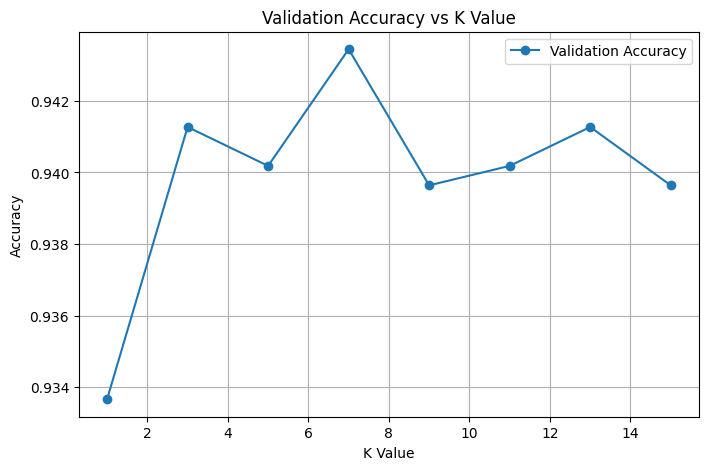

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, [results[k] for k in k_values], marker='o', label="Validation Accuracy")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy vs K Value")
plt.grid(True)
plt.legend()
plt.show()

In [9]:
import time
from sklearn.metrics import accuracy_score

# Select a single example from the test data
single_example = X_test_scaled[0].reshape(1, -1)  # Reshape for a single input

# Measure latency for KNN
start_time = time.time()
knn_prediction = knn_final.predict(single_example)
knn_latency = time.time() - start_time

# Print the latency result
print(f"KNN Latency (single prediction): {knn_latency:.4f} seconds")


KNN Latency (single prediction): 0.0040 seconds


In [10]:
# %%
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Measure latency for a single prediction
start_time = time.time()
y_test_pred = knn_final.predict(X_test)  # Use already defined knn_final and X_test
latency = time.time() - start_time

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average="weighted")  # Weighted for multi-class
recall = recall_score(y_test, y_test_pred, average="weighted")
f1 = f1_score(y_test, y_test_pred, average="weighted")

# Print the results
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"Latency (single prediction): {latency:.4f} seconds")


Test Accuracy: 0.936
Precision: 0.939
Recall: 0.936
F1-Score: 0.936
Latency (single prediction): 0.0275 seconds


In [11]:
# %%
import torch

# Determine hardware requirements
hardware = "High (GPU)" if torch.cuda.is_available() else "Low (CPU)"
print(f"Hardware Requirements: {hardware}")


Hardware Requirements: High (GPU)
